<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Chronic_Kidney_withoutcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [1]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset
chronic_df = pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal)
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)
		  rc in millions/cmm
- 	19.Hypertension(nominal)
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)
		  class - (ckd,notckd)

In [3]:
# checking info of columns and null values

chronic_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [4]:
# drop id column
chronic_df.drop('id', axis = 1, inplace = True)
#chronic_df =



In [5]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [7]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
cols = ['specific_gravity', 'albumin', 'sugar']






In [12]:
import pandas as pd
# ... existing code ...

# Replace '\t?' and similar invalid values with NaN
for column in ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']:
    chronic_df[column] = chronic_df[column].replace(r'\t?', np.nan, regex=True)
    chronic_df[column] = chronic_df[column].replace(r'\t', np.nan, regex=True)

# Now convert the columns to float
packed_cell_volume = chronic_df['packed_cell_volume'].astype('float')
white_blood_cell_count = chronic_df['white_blood_cell_count'].astype('float')
red_blood_cell_count = chronic_df['red_blood_cell_count'].astype('float')

# Assign the converted columns back to the DataFrame
chronic_df['packed_cell_volume'] = packed_cell_volume
chronic_df['white_blood_cell_count'] = white_blood_cell_count
chronic_df['red_blood_cell_count'] = red_blood_cell_count

<ipython-input-12-2fe0e96c84f4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_df[column] = chronic_df[column].replace(r'\t?', np.nan, regex=True)


In [14]:
# Extracting categorical and numerical columns

cat_cols = ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
            'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
# List of categorical columns

num_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
            'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
# List of numerical columns

In [16]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:  # Loop through each categorical column
    print(f"Column: {col}")  # Print the column name
    print(chronic_df[col].unique())  # Print the unique values in the column
    print("\n")  # Add a newline for better readability

Column: specific_gravity
[1.02  1.01  1.005 1.015   nan 1.025]


Column: albumin
[ 1.  4.  2.  3.  0. nan  5.]


Column: sugar
[ 0.  3.  4.  1. nan  2.  5.]


Column: red_blood_cells
[nan 'normal' 'abnormal']


Column: pus_cell
['normal' 'abnormal' nan]


Column: pus_cell_clumps
['notpresent' 'present' nan]


Column: bacteria
['notpresent' 'present' nan]


Column: hypertension
['yes' 'no' nan]


Column: diabetes_mellitus
['yes' 'no' ' yes' '\tno' '\tyes' nan]


Column: coronary_artery_disease
['no' 'yes' '\tno' nan]


Column: appetite
['good' 'poor' nan]


Column: peda_edema
['no' 'yes' nan]


Column: aanemia
['no' 'yes' nan]


Column: class
['ckd' 'ckd\t' 'notckd']




In [17]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
rep = ['\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd']
for col in cat_cols:
    for val in rep:
        chronic_df[col] = chronic_df[col].replace(val, np.nan)






In [18]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'] = chronic_df['class'].replace('ckd', 0)
chronic_df['class'] = chronic_df['class'].replace('notckd', 1)
chronic_df.head()





# coverting target col into numeric to check correlation






<ipython-input-18-ca8dbd831d4e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chronic_df['class'] = chronic_df['class'].replace('ckd', 0)


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,0.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,NaN,NaN,NaN,no,yes,no,poor,no,yes,0.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,NaN,NaN,NaN,yes,no,no,poor,yes,yes,0.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,NaN,NaN,NaN,no,no,no,good,no,no,0.0


In [19]:
# let's see the cols in numerical col list
print (num_cols)




['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


## **`EDA`**

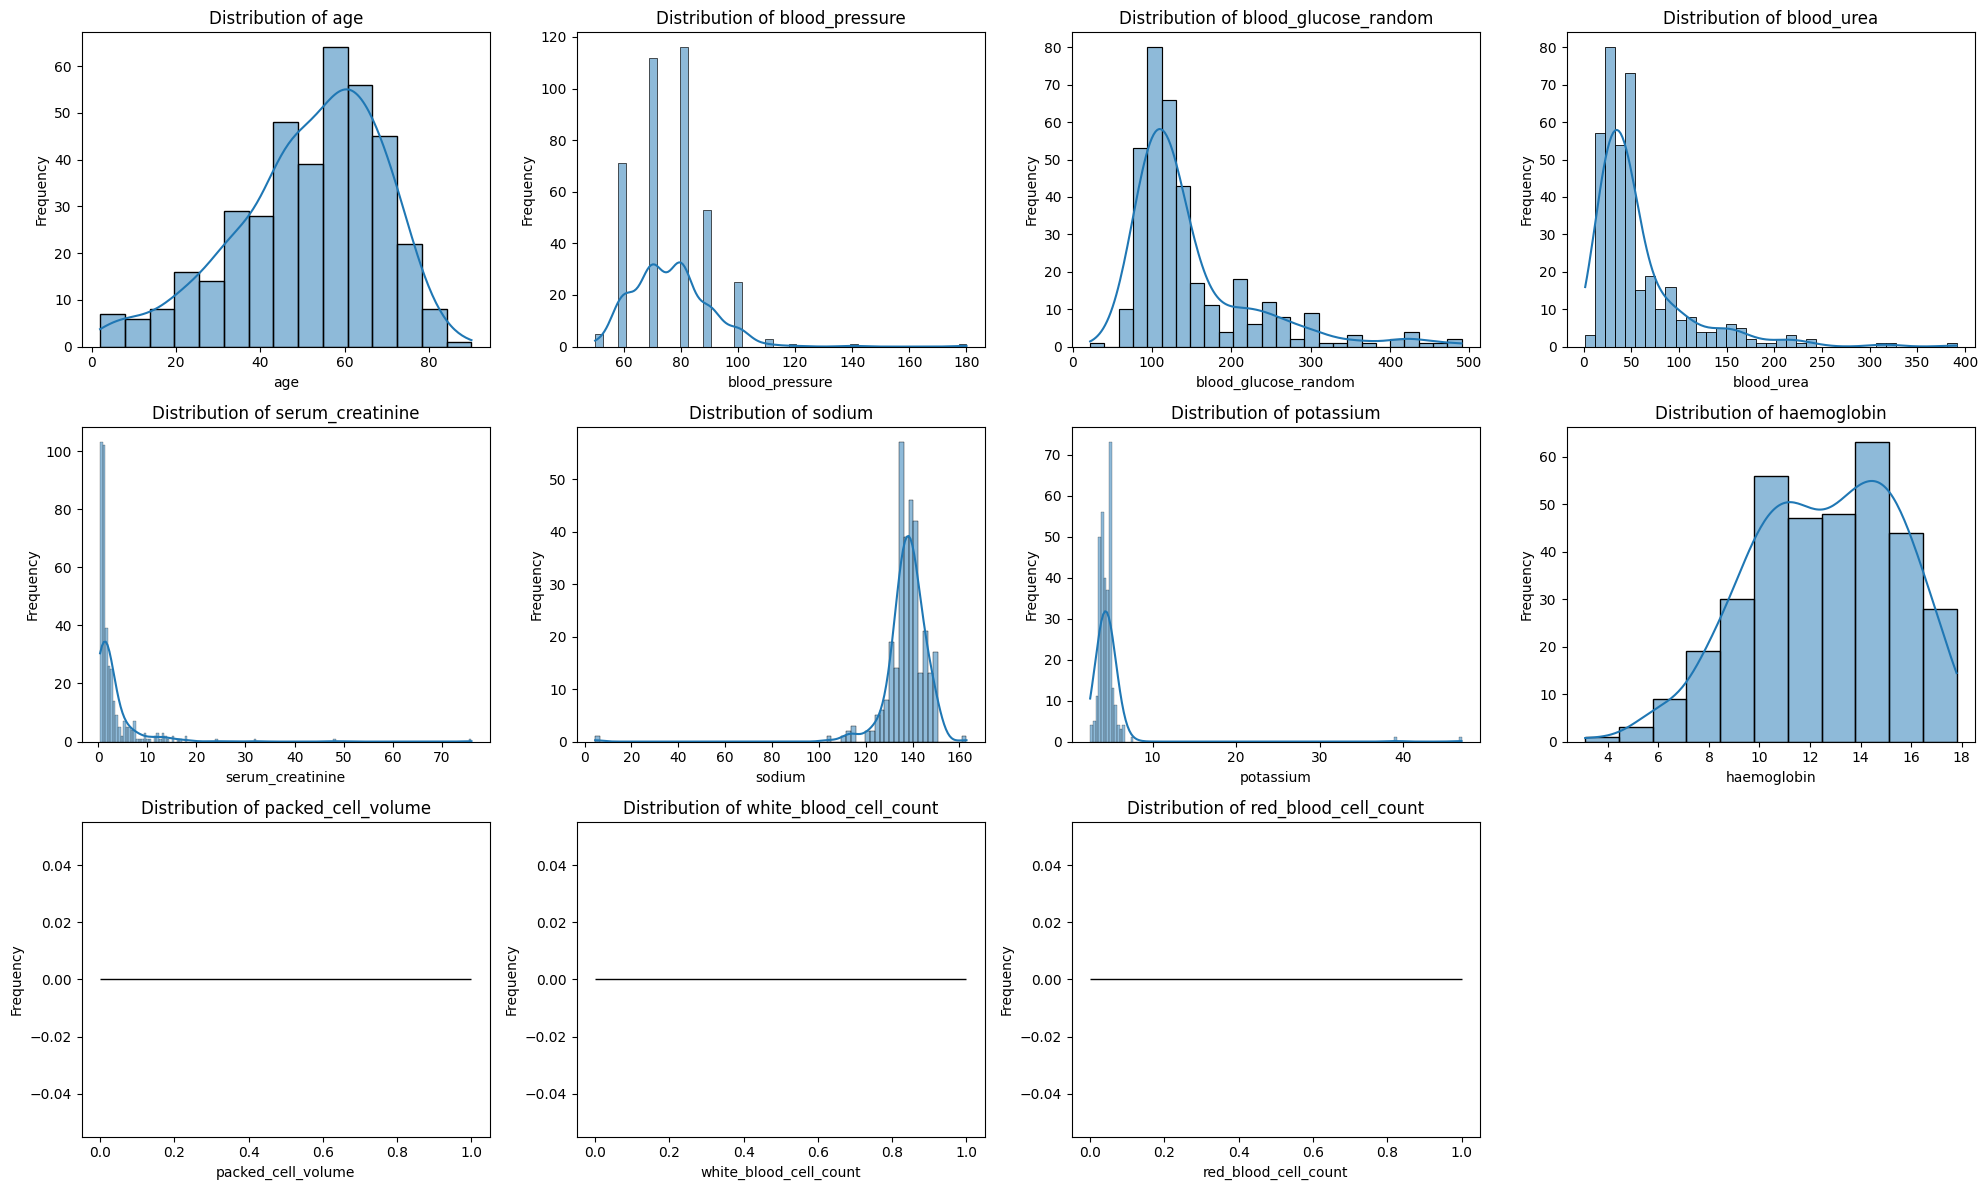

In [21]:
# checking numerical features distribution

plt.figure(figsize=(20, 12))

# looping over num cols and checking its distribution
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)  # Create subplots (3 rows, 4 columns)
    sns.histplot(chronic_df[col], kde=True)  # Plot histogram with kernel density estimation
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

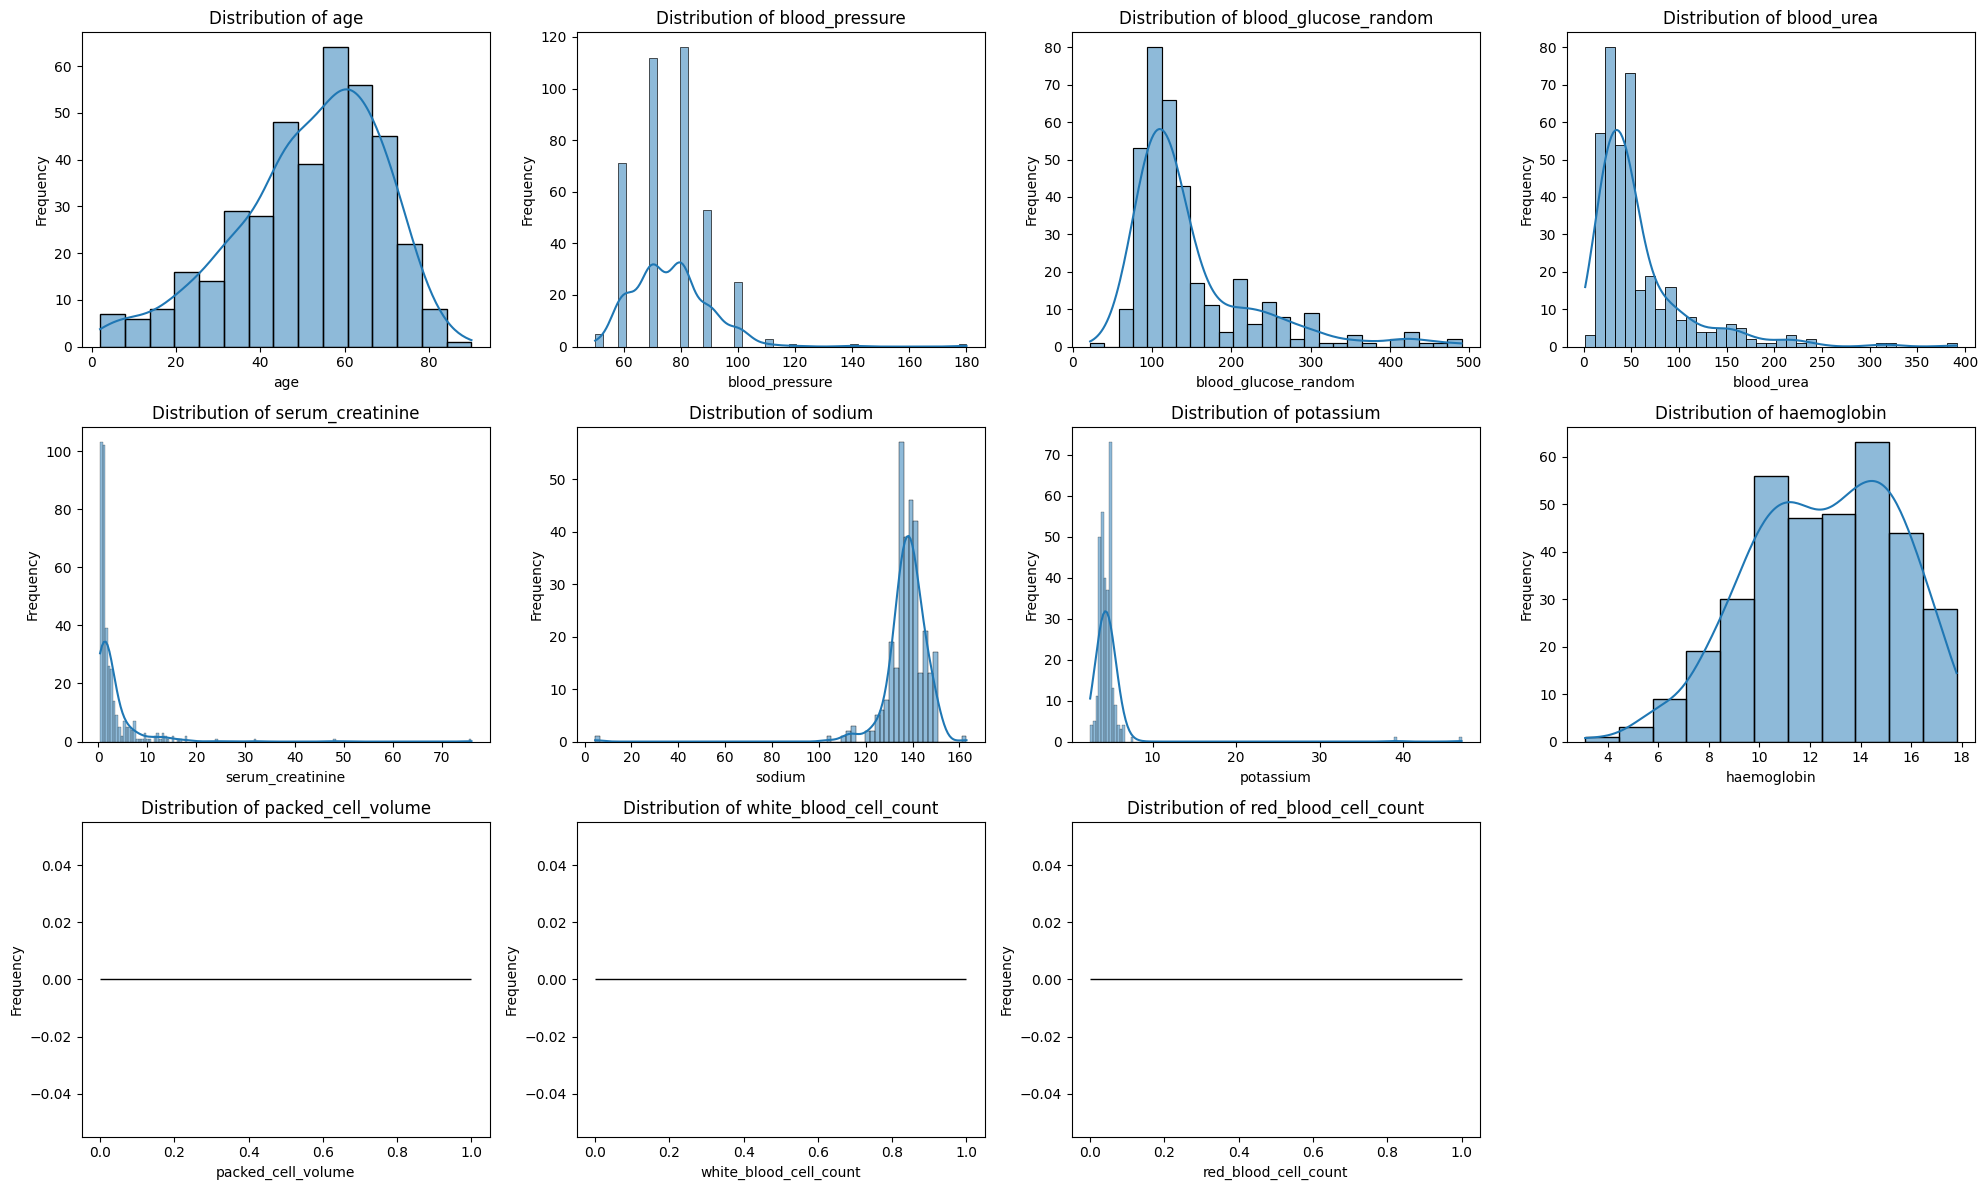

In [22]:
# checking numerical features distribution

plt.figure(figsize=(20, 12))

# looping over num cols and checking its distribution
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)  # Create subplots (3 rows, 4 columns)
    sns.histplot(chronic_df[col], kde=True)  # Plot histogram with kernel density estimation
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

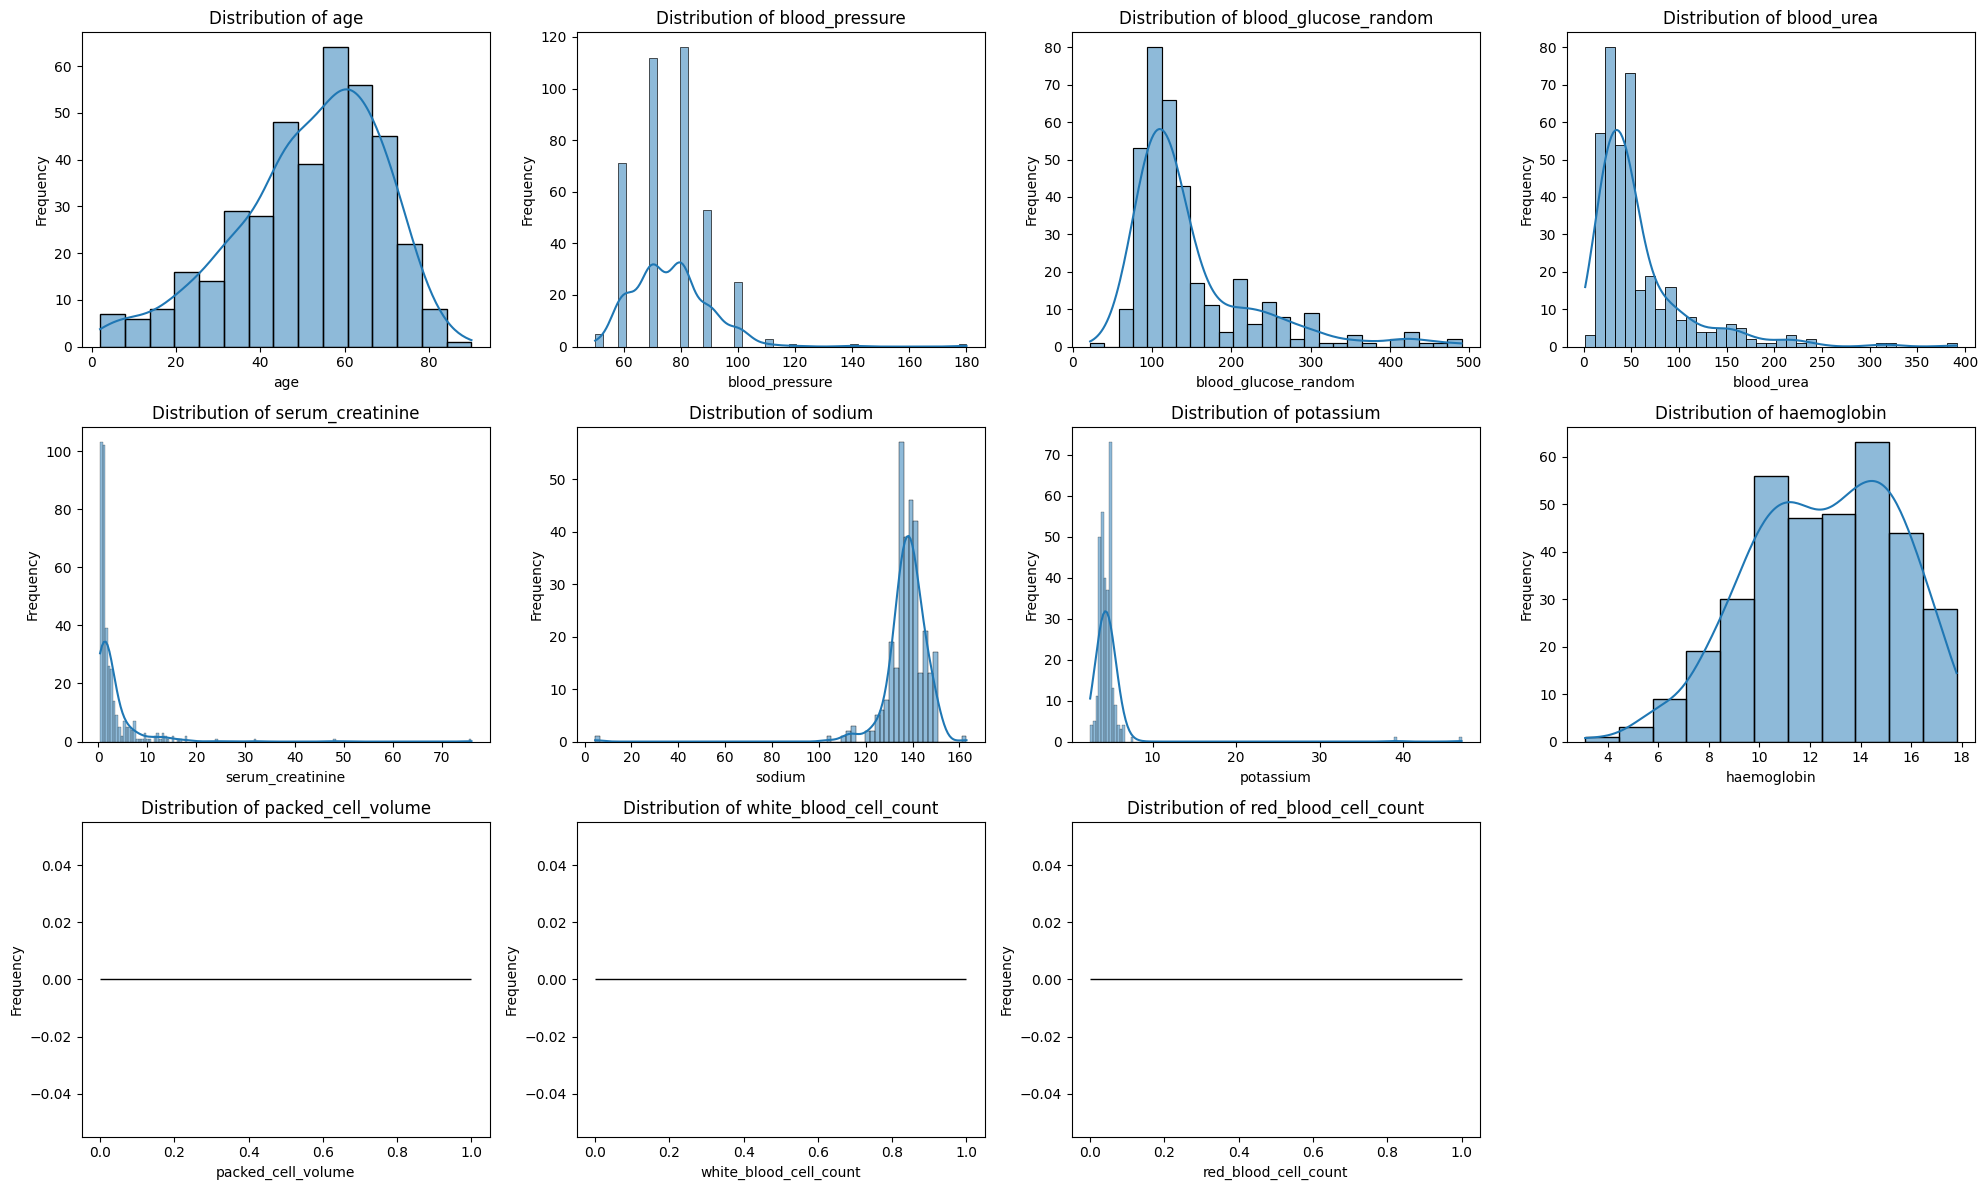

In [23]:
# checking numerical features distribution

plt.figure(figsize=(20, 12))

# looping over num cols and checking its distribution
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(chronic_df[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
# let's see the cols in cat col list
print (cat_cols)




['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


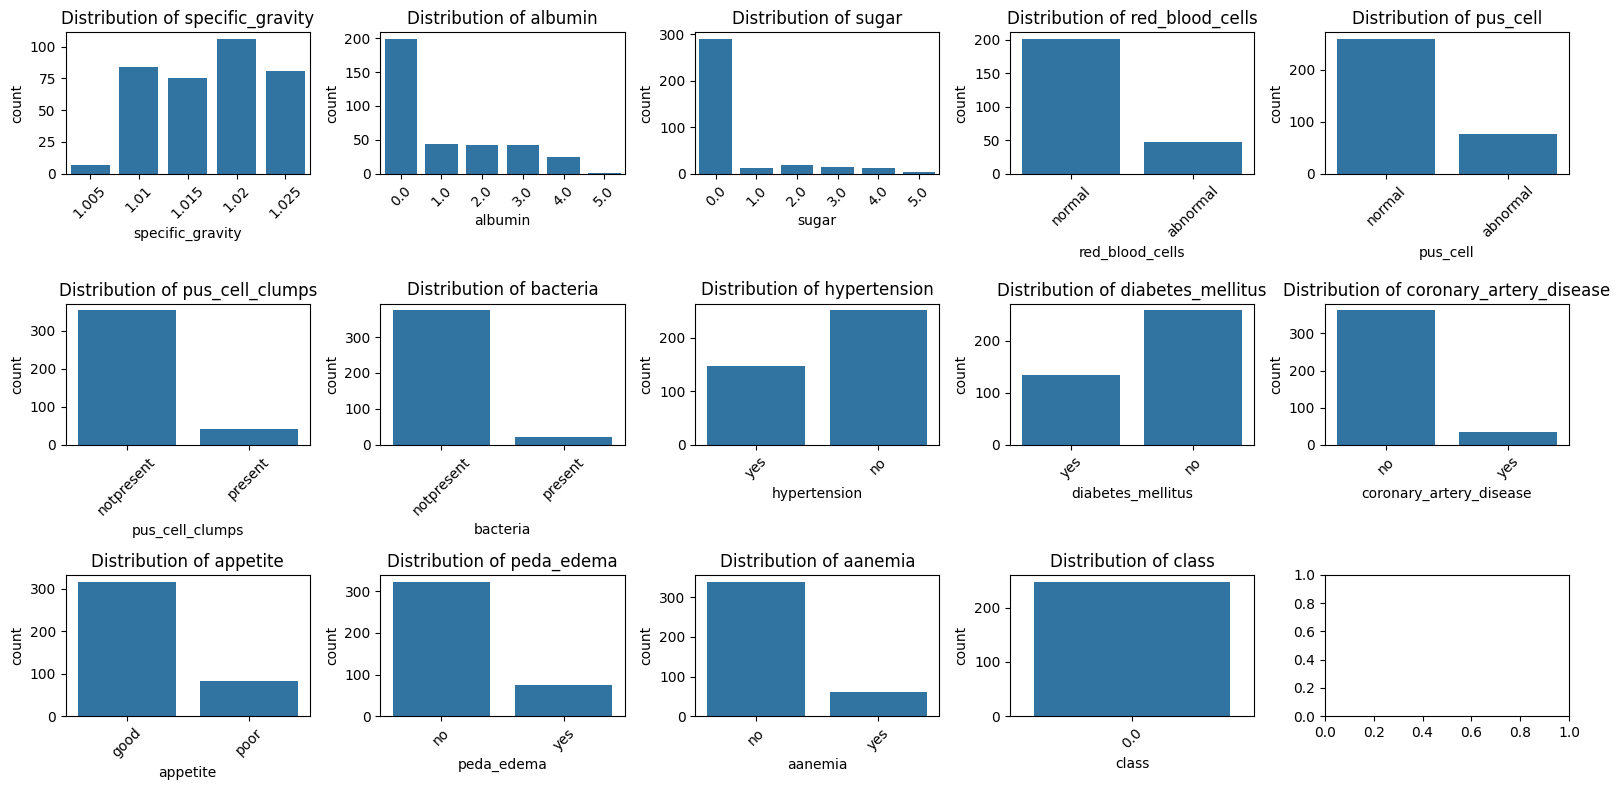

In [26]:
# checking cat features distribution

# create the figure and axes
fig, axes = plt.subplots(3, 5, figsize=(16, 8))
axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=chronic_df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

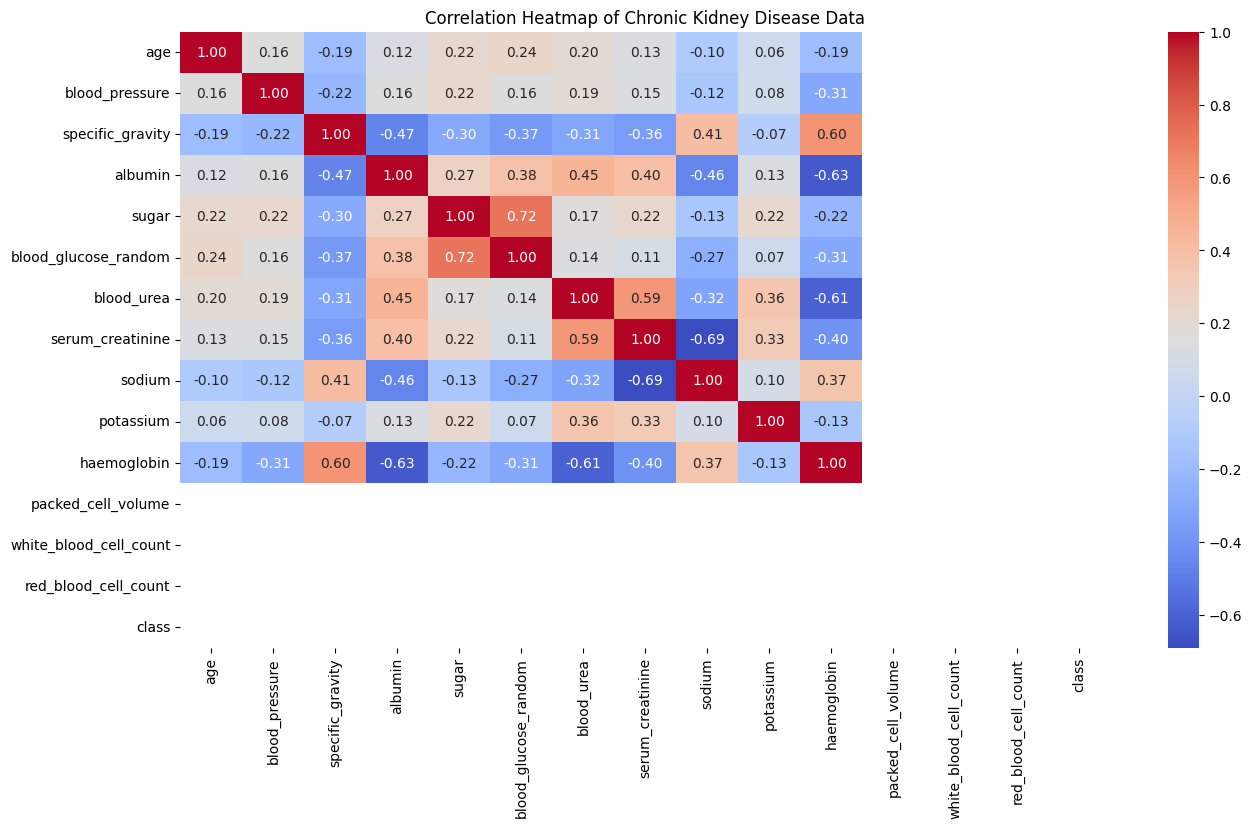

In [31]:
# correlated heatmap of data
plt.figure(figsize=(15, 8))
# Select only numerical features for correlation calculation
numerical_df = chronic_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Chronic Kidney Disease Data')
plt.show()

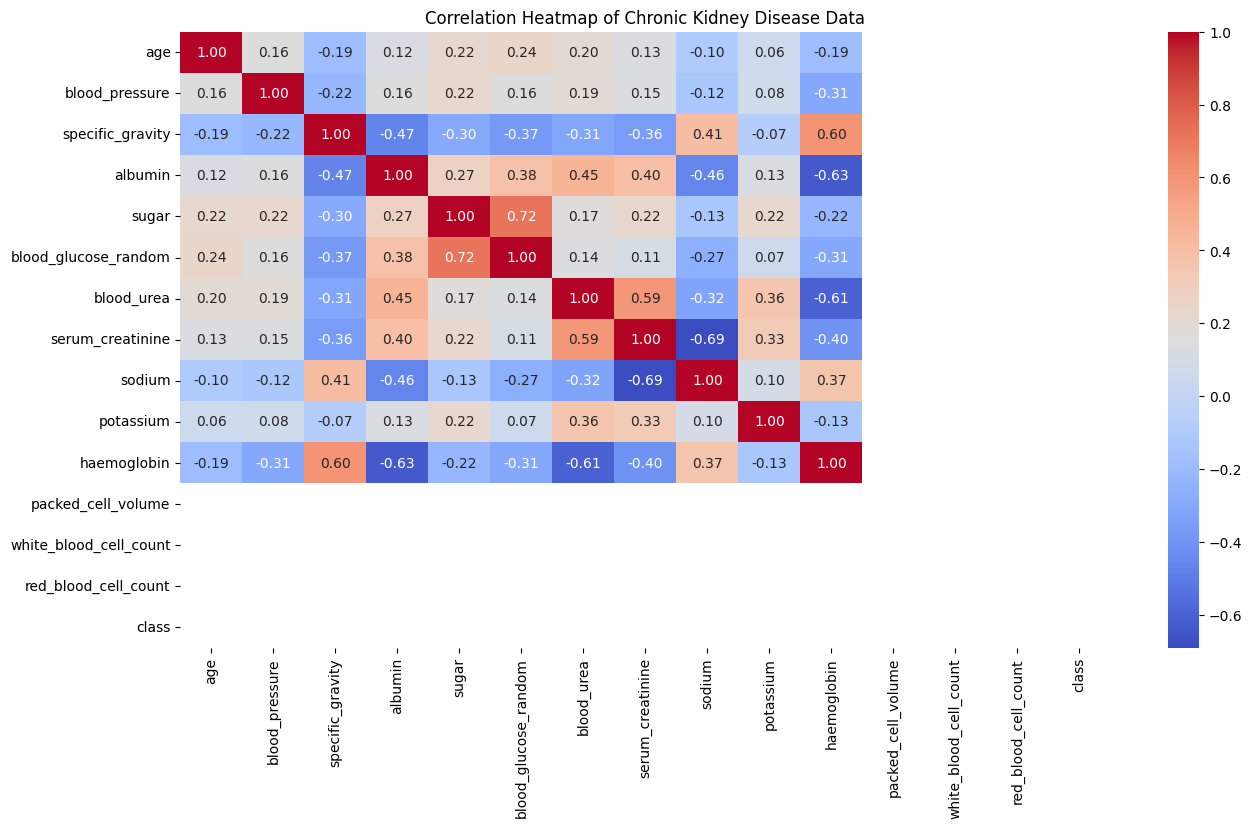

In [32]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
# Select only numerical features for correlation calculation
numerical_df = chronic_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Chronic Kidney Disease Data')
plt.show()

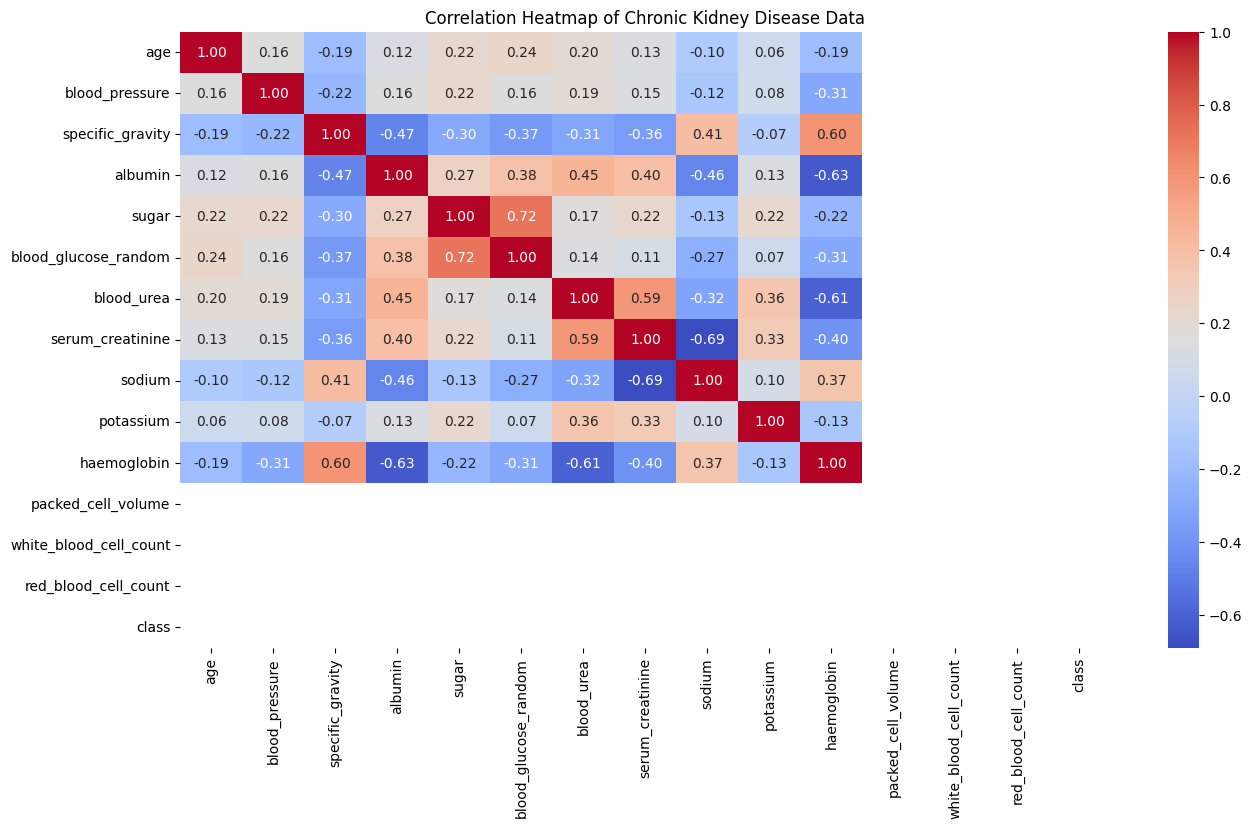

In [34]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
# Select only numerical features for correlation calculation
numerical_df = chronic_df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Chronic Kidney Disease Data')
plt.show()






In [35]:
# let's check count of null values in whole df
# let's check count of null values in whole df
print(chronic_df.isnull().sum())






age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume         400
white_blood_cell_count     400
red_blood_cell_count       400
hypertension                 2
diabetes_mellitus            8
coronary_artery_disease      4
appetite                     1
peda_edema                   1
aanemia                      1
class                      152
dtype: int64


In [36]:
# let's check count of null values in num_cols
print(chronic_df[num_cols].isnull().sum())




age                         9
blood_pressure             12
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume        400
white_blood_cell_count    400
red_blood_cell_count      400
dtype: int64


In [37]:
# let's check count of null values in cat cols
print(chronic_df[cat_cols].isnull().sum())





specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            8
coronary_artery_disease      4
appetite                     1
peda_edema                   1
aanemia                      1
class                      152
dtype: int64


## **`Missing Value Treatment`**

In [38]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isnull().sum(), random_state=0)
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample

# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [41]:
def random_value_imputation(feature):
    num_missing = chronic_df[feature].isnull().sum()  # Calculate the number of missing values
    if num_missing > 0:  # Check if there are any missing values
        random_sample = chronic_df[feature].dropna().sample(num_missing, random_state=0)
        random_sample.index = chronic_df[chronic_df[feature].isnull()].index
        chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample

In [42]:
# filling num_cols null values using random sampling method
#for col in num_cols:
#    random_value_imputation(col)






In [43]:
# let's check count of null values in num_cols again
print(chronic_df[num_cols].isnull().sum())





age                         0
blood_pressure              0
blood_glucose_random        0
blood_urea                  0
serum_creatinine            0
sodium                      0
potassium                   0
haemoglobin                 0
packed_cell_volume        400
white_blood_cell_count    400
red_blood_cell_count      400
dtype: int64


In [44]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')
for col in cat_cols:
    impute_mode(col)








In [45]:
# let's check count of null values in cat_cols again
print(chronic_df[cat_cols].isnull().sum())



specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64


In [46]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
    print(f"Unique values in {col}:")
    print(chronic_df[col].unique())
    print("\n")







Unique values in specific_gravity:
[1.02  1.01  1.005 1.015 1.025]


Unique values in albumin:
[1. 4. 2. 3. 0. 5.]


Unique values in sugar:
[0. 3. 4. 1. 2. 5.]


Unique values in red_blood_cells:
['normal' 'abnormal']


Unique values in pus_cell:
['normal' 'abnormal']


Unique values in pus_cell_clumps:
['notpresent' 'present']


Unique values in bacteria:
['notpresent' 'present']


Unique values in hypertension:
['yes' 'no']


Unique values in diabetes_mellitus:
['yes' 'no']


Unique values in coronary_artery_disease:
['no' 'yes']


Unique values in appetite:
['good' 'poor']


Unique values in peda_edema:
['no' 'yes']


Unique values in aanemia:
['no' 'yes']


Unique values in class:
[0.]




In [47]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [48]:
# check chronic df after transforming cat cols
chronic_df.head()





,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,NaN,NaN,NaN,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,410.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,NaN,NaN,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,NaN,NaN,NaN,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [49]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class', axis = 1)
y = chronic_df['class']




In [50]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)





## **`Model Building`**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ... (your existing code) ...

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now you can train your KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# ... (rest of your code) ...

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['packed_cell_volume' 'white_blood_cell_count' 'red_blood_cell_count']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


KNeighborsClassifier()

In [58]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)






# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn_pred)










In [59]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)






# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc_pred)







In [60]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

"""
Use this param
 {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

"""

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)
dtc_best_params = grid_search_dtc.best_params_
dtc_best_score = grid_search_dtc.best_score_
print(dtc_best_params)
print(dtc_best_score)







Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
1.0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
824 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [61]:
# print best parameters and best score in grid search dtc

print(f"Best Parameters: {grid_search_dtc.best_params_}")
print(f"Best Score: {grid_search_dtc.best_score_}")






Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 1.0


In [63]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_



# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc_pred)








In [65]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
rd_clf_pred = rd_clf.predict(X_test)
print (rd_clf_pred)




# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf_pred)
print (rd_clf_acc)







[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
1.0


In [66]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)


# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada_pred)
print (ada_acc)









1.0


In [69]:
# Check the unique values and their counts in y_train
print(y_train.value_counts())

# If there's only one class, adjust the train-test split or data collection to ensure both classes are present in the training set.
# For example, try a different random_state in train_test_split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)  # stratify=y ensures balanced class distribution

class
0    320
Name: count, dtype: int64


In [ ]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
from sklearn.ensemble import GradientBoostingClassifier # import GradientBoostingClassifier
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train) # Fit the model to the training data
sgb_pred = sgb.predict(X_test) # Make predictions on the test data



# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb_pred)
print("Accuracy:", sgb_acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, sgb_pred))
print("Classification Report:")
print(classification_report(y_test, sgb_pred))
print(sgb_acc)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


# accuracy score, confusion matrix and classification report of xgboost

xgb_acc =  accuracy_score(y_test, xgb_pred)
print("Accuracy:", xgb_acc)










Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9916666666666667 

Confusion Matrix :- 
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
# pip install catboost
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 91 kB/s 


In [ ]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)


# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat_pred)
print("Accuracy:", cat_acc)








Learning rate set to 0.408198
0:	learn: 0.3355370	total: 56.2ms	remaining: 505ms
1:	learn: 0.1668871	total: 62.7ms	remaining: 251ms
2:	learn: 0.0942740	total: 70.3ms	remaining: 164ms
3:	learn: 0.0714509	total: 79.4ms	remaining: 119ms
4:	learn: 0.0556378	total: 88.1ms	remaining: 88.1ms
5:	learn: 0.0448667	total: 93.5ms	remaining: 62.4ms
6:	learn: 0.0314548	total: 101ms	remaining: 43.1ms
7:	learn: 0.0266063	total: 108ms	remaining: 26.9ms
8:	learn: 0.0209733	total: 114ms	remaining: 12.6ms
9:	learn: 0.0193500	total: 125ms	remaining: 0us
Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted a

In [ ]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)




# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc_pred)
print("Accuracy:", etc_acc)









Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)




# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm_pred)
print("Accuracy:", lgbm_acc)






Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9916666666666667 

[[71  1]
 [ 0 48]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Stochastic Gradient Boosting', 'XGBoost', 'CatBoost', 'Extra Trees', 'LightGBM'],
    'Accuracy': [
        knn_acc,
        dtc_acc,
        rd_clf_acc,
        ada_acc,
        sgb_acc,
        xgb_acc,
        cat_acc,
        etc_acc,
        lgbm_acc
    ]
})
print(models)










,Model,Score
8,Extra Trees Classifier,1.000000
6,XgBoost,0.991667
1,Decision Tree Classifier,0.983333
4,Gradient Boosting Classifier,0.983333
5,Stochastic Gradient Boosting,0.983333
7,Cat Boost,0.983333
3,Ada Boost Classifier,0.975000
2,Random Forest Classifier,0.966667
0,KNN,0.633333
